# Imports

In [147]:
import pandas as pd
import seaborn
import numpy as np
import sklearn 
import scipy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Reading the Data file :

In [83]:

# reading csv files
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data =  pd.read_csv('iris.data', sep=",",names=names)
data.head(15) #to see how the data of the 15 first rows are

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [84]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

# mean, minimum and maximum

for each class of Iris, we generate:

    * mean, minimum and maximum of sepal length
    * mean, minimum and maximum of sepal width
    * mean, minimum and maximum of petal length
    * mean, minimum and maximum of petal width
    

In [85]:
sepal_length_stats = data.groupby('class').agg({'sepal-length': ['mean', 'min', 'max']})
print(sepal_length_stats)

                sepal-length          
                        mean  min  max
class                                 
Iris-setosa            5.006  4.3  5.8
Iris-versicolor        5.936  4.9  7.0
Iris-virginica         6.588  4.9  7.9


In [86]:
sepal_width_stats = data.groupby('class').agg({'sepal-width': ['mean', 'min', 'max']})
print(sepal_width_stats)

                sepal-width          
                       mean  min  max
class                                
Iris-setosa           3.418  2.3  4.4
Iris-versicolor       2.770  2.0  3.4
Iris-virginica        2.974  2.2  3.8


In [87]:
petal_length_stats = data.groupby('class').agg({'petal-length': ['mean', 'min', 'max']})
print(petal_length_stats)

                petal-length          
                        mean  min  max
class                                 
Iris-setosa            1.464  1.0  1.9
Iris-versicolor        4.260  3.0  5.1
Iris-virginica         5.552  4.5  6.9


In [88]:
petal_width_stats = data.groupby('class').agg({'petal-width': ['mean', 'min', 'max']})
print(petal_width_stats)

                petal-width          
                       mean  min  max
class                                
Iris-setosa           0.244  0.1  0.6
Iris-versicolor       1.326  1.0  1.8
Iris-virginica        2.026  1.4  2.5


# Visualising the data

## Univariate plot
 shows the data **and** summarizes its distribution.

sepal-length       AxesSubplot(0.125,0.53;0.352273x0.35)
sepal-width     AxesSubplot(0.547727,0.53;0.352273x0.35)
petal-length       AxesSubplot(0.125,0.11;0.352273x0.35)
petal-width     AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

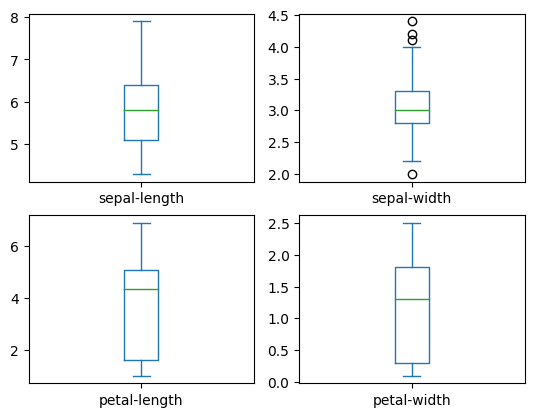

In [89]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

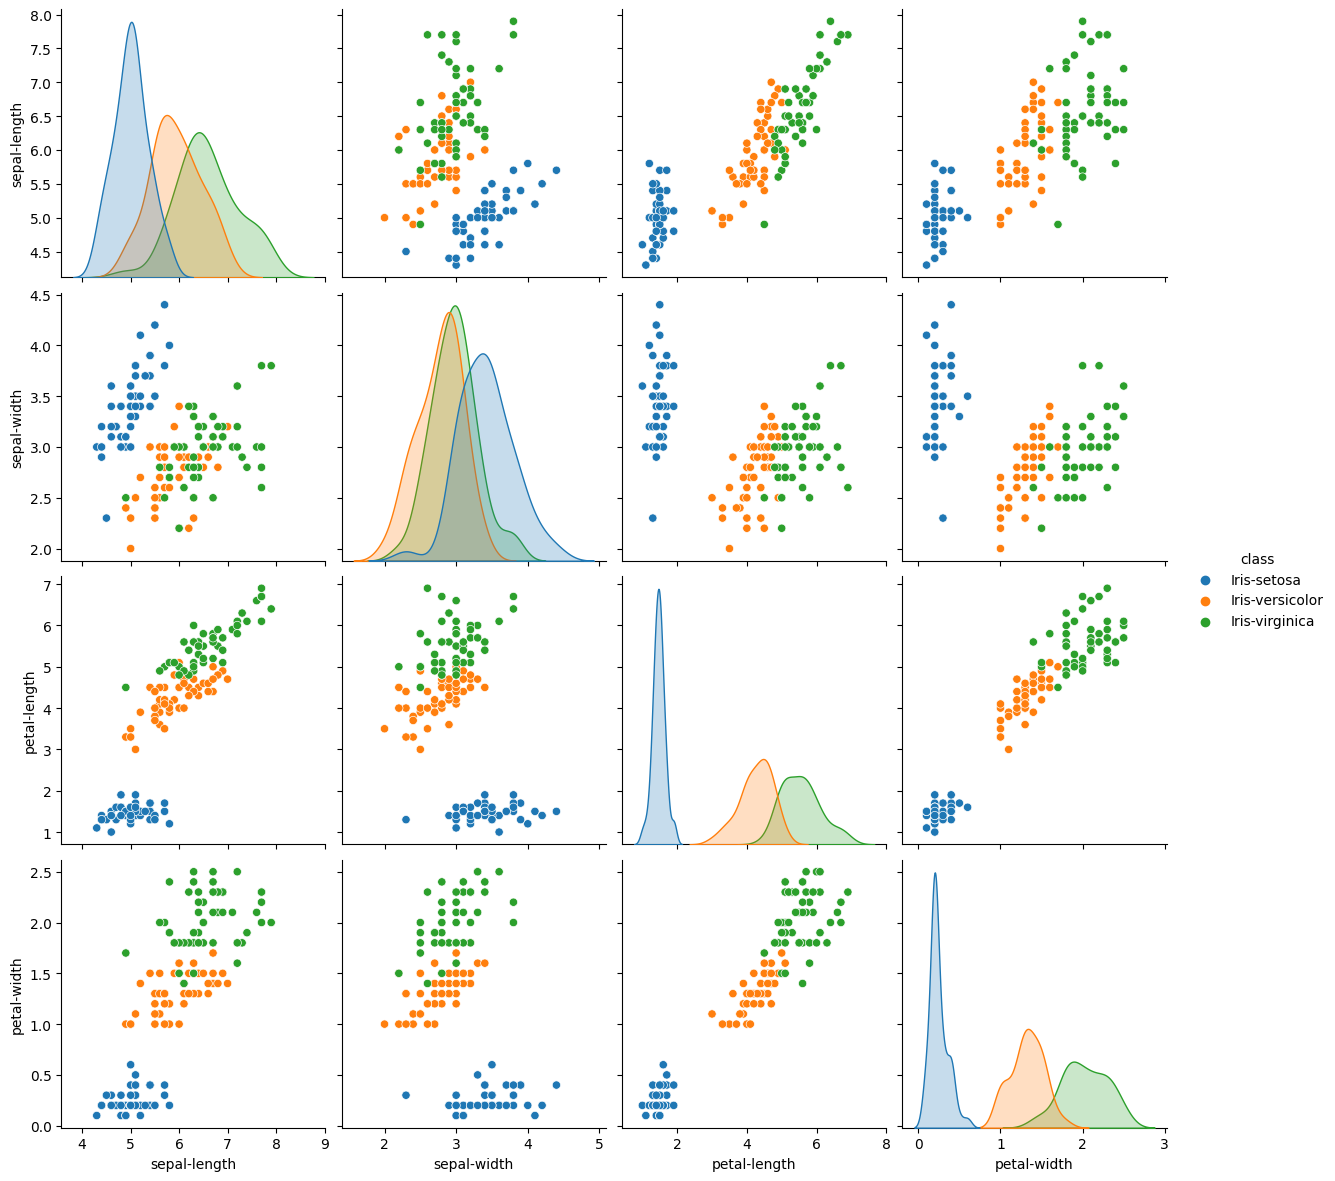

In [90]:
seaborn.pairplot(data, hue='class', height=3, diag_kind="kde")